In [2]:
import torch
from torch import nn


import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__

'1.13.0'

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

In [3]:
train_data = datasets.FashionMNIST(
    root= 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None # to transform labels
)

test_data = datasets.FashionMNIST(
    root= 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [13]:
image,label = train_data[10]

label,image

(0,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
           0.5569, 0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
           0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000,
           0.8275, 0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255, 0.6510,
           0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
           0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6000, 0.6275,
           0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373, 0.7451,
           0.7333, 0.6824, 0.7647, 0.72

In [14]:
# [color_channels=1, height=28, width=28]
image.shape

torch.Size([1, 28, 28])

In [15]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [16]:
class_names = train_data.classes

class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

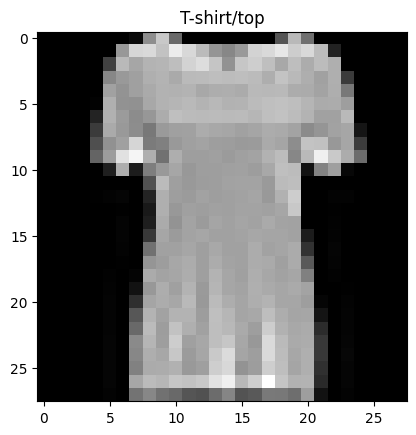

In [17]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

In [49]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                             batch_size = BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001988ED73D90>, <torch.utils.data.dataloader.DataLoader object at 0x000001988ED73A30>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## Model_0

In [50]:
class Model_0(nn.Module):
    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
        
    def forward(self,x):
        
        return self.layer_stack(x)

In [51]:
torch.manual_seed(42)

model_0 = Model_0(784, # 28*28
                 10,
                 len(class_names))

model_0.to(device)

Model_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [52]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### training loop
### epochs - batches - update loss per batch

In [44]:
from tqdm.auto import tqdm

In [53]:
%%time
epochs = 3
line_boundary = '-'*10
for epoch in tqdm(range(epochs)):
    print(f'Epoch {epoch} \n{line_boundary}')
    train_loss = 0
    for batch,(x,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(x)
        loss = loss_fn(y_pred,y)
        train_loss +=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        if batch%400 == 0:
            print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")
    
    train_loss /= len(train_dataloader)
    
    test_loss,test_acc = 0,0
    model_0.eval()
    
    with torch.inference_mode():
        for x,y in test_dataloader:
            test_pred = model_0(x)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.90866 | Test loss: 0.63134, Test acc: 78.02%

Epoch 1 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.55704 | Test loss: 0.54226, Test acc: 81.32%

Epoch 2 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.50234 | Test loss: 0.51646, Test acc: 82.14%

CPU times: total: 2min 29s
Wall time: 25.3 s


## Model_1

In [78]:
# adding non-linearity
# using non linear activation function in each linear layer

class Model_1(nn.Module):
    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
        
    def forward(self,x):
        
        return self.layer_stack(x)

In [95]:
model_1 = Model_1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

model_1

Model_1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [96]:
# train step & test step functions


def train_step(model,dataloader,loss_fn,optimizer,accuracy_fn,device):
    train_loss,train_acc = 0,0
    for batch,(x,y) in enumerate(dataloader):
#         model.train()
        x,y = x.to(device),y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
def test_step(model,dataloader,loss_fn,accuracy_fn):
    test_loss,test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for x,y in dataloader:
            x,y = x.to(device),y.to(device)
            test_pred = model(x)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [97]:
%%time

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch {epoch} \n{line_boundary}')
    
    train_step(model_1,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
    test_step(model_1,test_dataloader,loss_fn,accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 
----------
Train loss: 1.03426 | Train accuracy: 62.75%
Test loss: 0.91306 | Test accuracy: 66.13%

Epoch 1 
----------
Train loss: 0.89582 | Train accuracy: 66.66%
Test loss: 0.87604 | Test accuracy: 66.99%

Epoch 2 
----------
Train loss: 0.86708 | Train accuracy: 67.37%
Test loss: 0.86916 | Test accuracy: 67.32%

CPU times: total: 3min 5s
Wall time: 31.2 s
